# Teoria del metodo

Dada una lista ordenada de n + 1 puntos (x0, y0), (x1, y1), . . ., (xn, yn) que
cumplen las hipótesis de interpolación, se desea construir una función a trozos

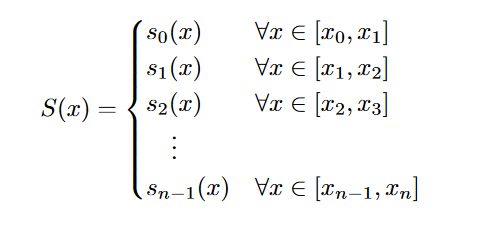

donde los si(x) son n polinomios cúbicos.

Como cada polinomio si(x) es de la forma ai + bix + cix2 + dix3, entonces es necesario
calcular 4n coeficientes para construir el trazador S(x).

Para facilitar la construcción del trazador cúbico, se seleccionan polinomios cúbicos si(x) de la forma ai + bi(x − xi) + ci(x − xi)2 + di(x − xi)3, con lo cual:

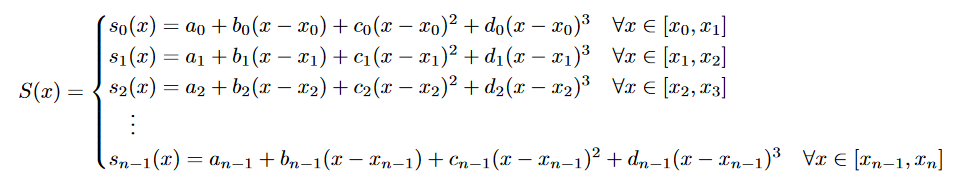

Para que el trazador cúbico S(x) cumpla las condiciones deseadas, los
coeficientes de los polinomios deben satisfacer las siguientes ecuaciones:

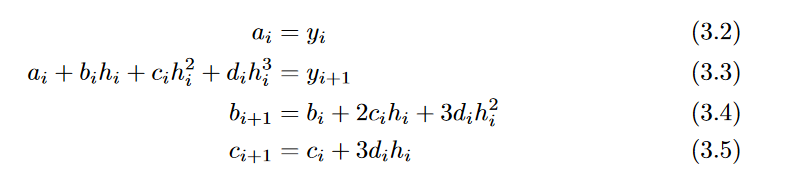

* Despejar di en la ecuación 3.5 y concluir que di = (ci+1 − ci)/3hi para i = 0, 1, . . . , n−2.

* Sustituir di en las ecuaciones 3.3 y 3.4 para obtener

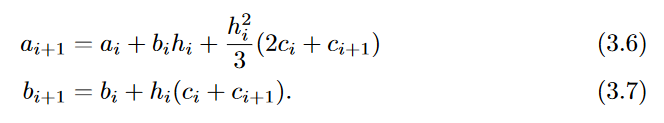

* Disminuir en una unidad el índice de 3.7

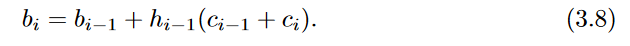

* Al despejar bi de la ecuación 3.6 y reemplazar adecuadamente en 3.8 se obtiene la
siguiente relación válida para i = 1, 2, . . . , n − 1.

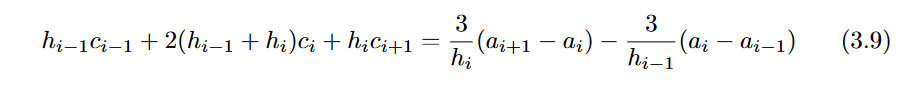

que es la ecuacion que se usa para calcular bi



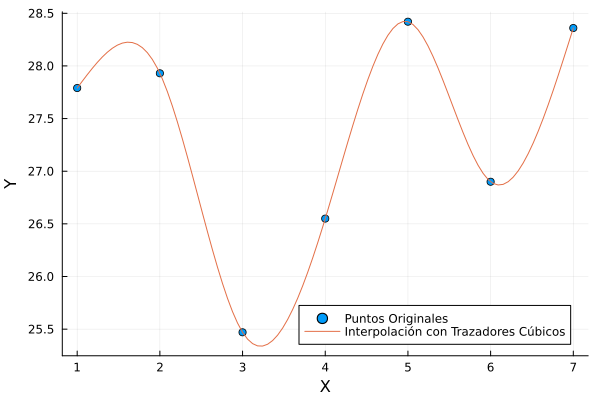

In [1]:
using Plots

ruta = "C:/Users/Usuario/OneDrive/Documentos/Datos.csv"
# Leer la fila de datos como una cadena de texto desde el archivo CSV
datos_str = read(ruta, String)

# Dividir la cadena en substrings usando la coma como delimitador
datos_substrings = split(datos_str, ",")

# Convertir los substrings en números de punto flotante
datos_xi = [1,2,3,4,5,6,7] 
datos_yi = parse.(Float64, datos_substrings)


#=
 a -- vector de coeficientes (constantes)
 b -- vector de coeficientes (lineales)
 c -- vector de coeficientes (cuadráticos)
 d -- vector de coeficientes (cúbicos)
=#
function splines(datos)
    n = length(datos) - 1
    
    # Inicializar vectores auxiliares
    A = [x[2] for x in datos]
    X = [x[1] for x in datos]
    H = zeros(n)
    B = zeros(n+1)
    C = zeros(n+1)
    D = zeros(n+1)
    alpha = zeros(n)
    mu = zeros(n+1)
    lo = ones(n+1)
    z = zeros(n+1)
    
    # Crear vector H
    for i in 1:n
        H[i] = X[i+1] - X[i]
    end
    
    # Crear vector α
    for i in 2:n
        alpha[i] = (3/H[i])*(A[i+1]-A[i]) - (3/H[i-1])*(A[i]-A[i-1])
    end
    
    # Solucionar sistema tridiagonal hacia adelante
    for i in 2:n
        lo[i] = 2*(X[i+1]-X[i-1]) - H[i-1]*mu[i-1]
        mu[i] = H[i] / lo[i]
        z[i] = (alpha[i] - H[i-1]*z[i-1]) / lo[i]
    end
    
    # Solucionar sistema tridiagonal hacia atrás
    for j in n:-1:1
        C[j] = z[j] - mu[j]*C[j+1]
        B[j] = (A[j+1] - A[j]) / H[j] - H[j] * (C[j+1] + 2*C[j]) / 3
        D[j] = (C[j+1] - C[j]) / (3*H[j])
    end
    
    # Retornar vectores A, B, C, D
    return A[1:end-1], B[1:end-1], C[1:end-1], D[1:end-1]
end

#Hago un vector con tuplas (que es lo mismo que hacer una matriz 7x2)
datosPrueba = [(datos_xi[1], datos_yi[1]), (datos_xi[2], datos_yi[2]), (datos_xi[3], datos_yi[3]), (datos_xi[4], datos_yi[4]), (datos_xi[5], datos_yi[5]),(datos_xi[6],datos_yi[6]),(datos_xi[7],datos_yi[7])]
a, b, c, d = splines(datosPrueba)
# Funcion para evaluar el trazador cubico en un punto x
function evaluar_cubico(a, b, c, d, x, xi)
    i = 1
    while i < length(xi) && xi[i+1] < x
        i += 1
    end
    return a[i] + b[i]*(x - xi[i]) + c[i]*(x - xi[i])^2 + d[i]*(x - xi[i])^3
end

# Generar puntos interpolados
x_interpolados = range(minimum(datos_xi), stop=maximum(datos_xi), length=100)
y_interpolados = [evaluar_cubico(a, b, c, d, x, datos_xi) for x in x_interpolados]

# Graficar puntos originales y trazador cubico
scatter(datos_xi, datos_yi, label="Puntos Originales")
plot!(x_interpolados, y_interpolados, label="Interpolación con Trazadores Cúbicos", xlabel="X", ylabel="Y")